<a href="https://colab.research.google.com/github/Manchal09/mainflow-tasks/blob/main/Mainflowtask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Shopping Mall Customer Segmentation Data task3.csv to Shopping Mall Customer Segmentation Data task3.csv


In [6]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Shopping Mall Customer Segmentation Data task3.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df
# Inspect the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate entries:", data.duplicated().sum())
print("\nData types:\n", data.dtypes)
print("\nSummary statistics:\n", data.describe())
print(data.columns.tolist())

Shape of the dataset: (15079, 5)
Columns in the dataset: Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

Missing values:
 Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

Duplicate entries: 0

Data types:
 Customer ID       object
Age                int64
Gender            object
Annual Income      int64
Spending Score     int64
dtype: object

Summary statistics:
                 Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.000000
['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score

In [10]:
# Import scaling library
from sklearn.preprocessing import StandardScaler

# Select features for clustering
# We will use 'Age', 'Annual Income', and 'Spending Score'
features = data[['Age', 'Annual Income', 'Spending Score']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame for better visualization
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])
print("\nScaled data sample:\n", scaled_df.head())


Scaled data sample:
         Age  Annual Income  Spending Score
0 -1.145516       0.798813        1.337059
1  0.180335       1.442076        1.545929
2  0.369742      -0.743208        0.884507
3 -1.476979      -1.038953        0.223086
4 -1.429627       0.842317        0.884507


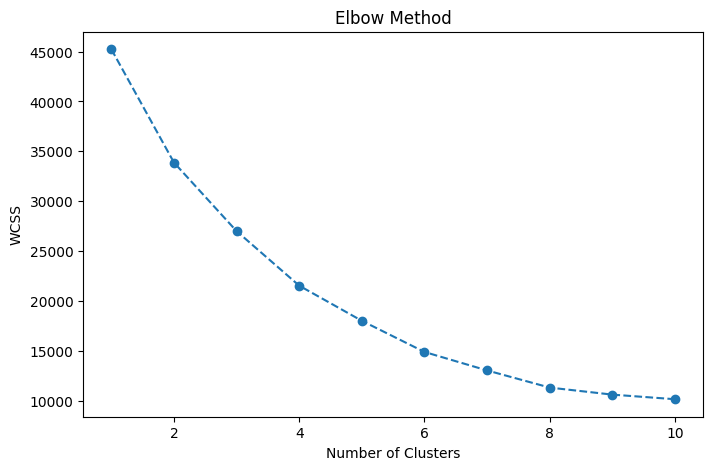

In [11]:
# Import libraries for clustering and evaluation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Test cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# From the elbow plot, decide the optimal number of clusters (replace 'k' with the optimal number)
k = 5  # Example value, update based on your Elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Inspect the clustered dataset
print("\nClustered data sample:\n", data.head())


Clustered data sample:
                             Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  Cluster  
0              89        2  
1              95        4  
2              76        1  
3              57        0  
4              76        2  


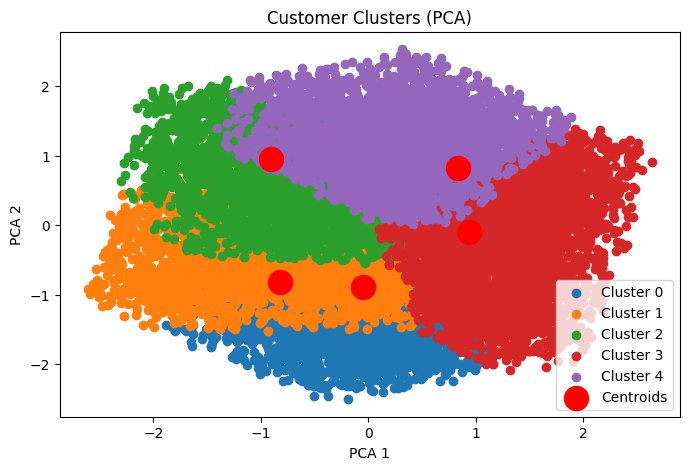

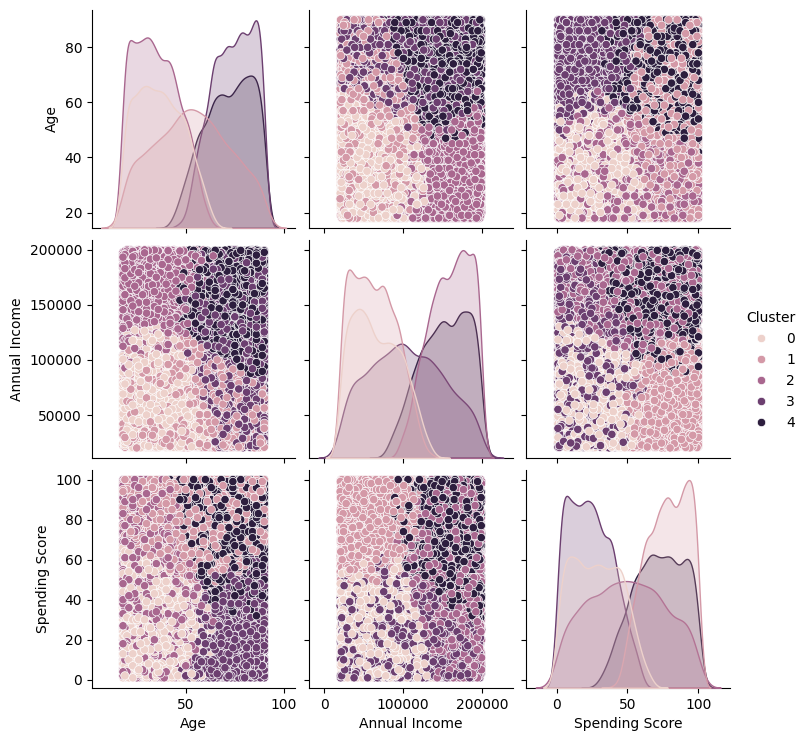

In [14]:
# 2D Scatter Plot Using PCA
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 5))
for cluster in range(k):
    plt.scatter(reduced_features[data['Cluster'] == cluster, 0],
                reduced_features[data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Pair Plot
import seaborn as sns

sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income', 'Spending Score'])
plt.show()